<a href="https://colab.research.google.com/github/geopayme/AstroPhysics/blob/main/CINeMA_MetaAnalysis_PHIsNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CINeMA-Based Meta-Analysis Colab Notebook
This notebook simulates data and performs CINeMA-style evaluation based on a study of Public Health Inspectors (PHIs) and occupational risks under climate crisis conditions.

In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style='whitegrid')

In [2]:
# Step 2: Load Simulated Data
data = '''Workplace,EPF,CF,BF,CCF,PVF,OF,Training_Quality,Training_Needs,Experience_Years,Education_Level,Marital_Status
Rural,0.6413767667055712,3.024432609341971,2.1361282355803106,3.010779186667357,3.0748948716281737,2.5114132567354432,3.262181373626455,2.78197325617506,25,Master,Single
Urban,2.7418625607221365,1.5078930577829355,0.7270829493822193,2.4257036510864047,2.498757879182187,3.3463032674628974,2.6325447927611,3.1412717630533966,29,Master,Married
Rural,2.223138483893795,3.6890541132930013,3.466261883140946,3.004500594430734,2.235831410936175,3.2985268388953193,2.8229461792760064,2.6460736616284084,9,Master,Married
Rural,2.2976042004710404,2.5494788102127766,1.8108577387831128,2.352219406335864,2.2371039496588425,1.1085347773527243,3.226768916872588,2.609143739694016,1,Bachelor,Single
Urban,2.8170554285734566,2.056777932511797,2.725758503611044,3.3719963281227425,4.685901092026167,1.8787194031715422,3.6122922188130717,3.439796293993183,18,PhD,Married
Urban,2.3837573641542544,2.3514617120827475,3.571760840673979,2.8196091863618835,3.550270641253315,1.3505545108836228,3.811698281149523,3.3035655503918093,21,Bachelor,Married
Rural,2.6504571810663284,1.9132016891491894,1.8249583070483357,3.008525636516863,2.1279119371333293,4.201389682024109,2.23152601998684,3.6555794431590525,4,Bachelor,Single
Semi-Urban,1.0843795467629855,1.6108537871581114,2.771534206635785,4.698948787783234,2.9317582619497125,2.515686459650139,3.133875612182231,2.373705493817252,10,Bachelor,Single
Rural,1.8398602340729164,2.1660786090285757,4.071408669174428,2.125026881779985,2.50997197992051,4.024663370373315,3.7297468016917605,2.748768756544692,25,Master,Married
Rural,3.4827711170615054,2.7079923737493323,0.48892764882286865,3.8720075883282012,3.267040300925032,1.2936381755664133,2.1573445306190298,3.1405897811347265,7,Master,Married
Rural,2.487014436841852,1.6283762010840257,1.9705447377187033,1.0384540500654391,3.2347992822314735,2.1417852603611793,3.1571917470274236,2.5371895751128166,22,Master,Single
Rural,1.3285467646068438,1.5022102680749767,1.8859123045916362,1.4451363415567398,3.6668877231243764,3.2403985934127784,2.998958101289908,3.3208437185773247,23,PhD,Single
Urban,1.7492277158950398,1.715609087266912,2.531785389695632,2.0315519456187006,2.1195548330702434,2.7434196835413474,3.207270907189894,3.612313543613166,1,Bachelor,Single
Rural,1.8051896744177667,2.7616088750773558,2.656988210363816,2.0757301443075447,2.8837882389105043,3.026287914250767,2.6138479873367624,2.708321013886326,17,PhD,Married
Semi-Urban,2.571643377784767,3.1620401979698967,1.744863630348069,3.0425912586971946,1.4011624120339787,1.5969534129653944,2.28219058589328,3.0192959701135167,24,Master,Single
Urban,2.1971735036163906,2.2896111295539763,2.111063988498286,3.102889584917927,1.794127759656924,3.7014427943031434,2.0434467874104874,3.7278093450405585,29,PhD,Single
Semi-Urban,2.0385723882944653,2.4650513072285793,2.004097526592459,2.721625112139345,3.5072806692473435,3.2216128766058314,3.488191976731051,3.8996357875095,29,Bachelor,Married
Semi-Urban,2.5027561131019818,1.4962393141879096,2.384289679344418,2.7950854232662765,2.0394529668757384,2.921300404393179,3.552024568241677,3.372900625530202,2,Bachelor,Married
Semi-Urban,2.834427869603469,2.7014037199618604,2.8964004592779866,3.2694353326521624,2.1272729615617156,2.051511775134554,3.151342674497993,3.2967145865968046,28,Master,Married
Semi-Urban,2.3186799486827767,2.4413896083720594,3.519507710133973,3.483256714334519,2.7933775403599603,2.8590401020847565,2.7329258251559514,2.573131732657544,26,Master,Married
Urban,2.09770355467062,1.431897633658013,3.6497978968917733,1.9714226887231687,3.3558088246772315,2.3668080168052077,2.1884770532671274,3.1796047002289205,11,PhD,Married
Urban,2.2049512457620817,0.5698627104545744,3.2882708352017915,2.6466763201368972,1.951338563332723,1.2796070319697905,3.281672731252512,3.278410420387499,9,Master,Single
Semi-Urban,2.7378746749306506,1.0235439165745164,1.9134232924634134,2.851287123960893,0.01535293699193252,2.55966171862281,2.4496103585816575,2.8948149207194773,7,Master,Single
Semi-Urban,2.494833895038799,1.4646378174550296,2.6970336717053818,3.239721197592317,2.1038214062851903,2.4746156814219793,2.644350687619731,2.702611872722169,22,Bachelor,Married
Urban,3.0371077870944827,2.9295498541974196,4.83689646314315,2.3591330004085704,3.7645024623622696,3.449921207900096,2.706717960218641,2.3593511632615725,17,Master,Married
Urban,1.6951451957539492,3.2422878206714607,3.613079423418568,2.8375451770844307,3.0745080408134986,0.812458846148638,2.901232387151516,2.1311351224743538,17,Master,Married
Urban,1.957264725830139,1.6483856996205781,2.303545897013828,2.92098854416901,3.8590998430297705,2.7881598630837607,2.6204797763956758,2.0260582433394188,2,Bachelor,Married
Rural,3.041198599122474,1.6736677177829633,4.1238343646674025,2.406870927578329,1.8945470862938432,1.6755455615154262,3.016729385496151,3.2897212864336307,6,Bachelor,Married
Rural,1.9387205096552145,2.209298444777973,2.3507377291823275,2.39017939503648,1.4884829858687547,2.8553786737564373,2.6890908497468042,3.0738496626133887,14,PhD,Single
Rural,3.468811003252875,2.0097172072585803,2.098438228527059,2.9691220443461344,3.170038842118032,2.8994240444618447,3.3506865324196116,2.7580944342294518,6,Master,Single
Semi-Urban,3.4836437141147316,2.7447472671792634,3.956158742335708,2.8087583978089543,2.9920181901480367,2.5305241782958467,3.515531456994027,2.8342718511376805,2,Bachelor,Single
Rural,3.474628027444332,1.5814495251303122,1.5213156389892917,3.2503342635944423,3.0444434563018063,3.2458344998488675,3.0542713380142192,3.105235270765242,1,PhD,Single
Semi-Urban,1.8835514270291616,2.759314390224799,0.9776001777584795,2.162718895548503,3.5463973141204543,1.6033871527202408,3.2313131676905513,2.917718464495703,10,PhD,Married
Semi-Urban,2.5538264640092,1.808620161704196,3.547156120254428,2.6545229304848488,3.137347939129808,3.4861763602253606,4.058927974812945,2.3297234099980857,21,Master,Single
Rural,2.1545972624576715,2.6831797688542847,2.7249218384545917,2.7395487639124854,3.124494074512303,2.033536907044687,2.413698371569342,3.4565001101371498,5,Master,Married
Semi-Urban,3.146213825839367,1.783167630169166,2.8146289306834404,3.4697047356865234,3.3720056110409127,1.3552810796080836,2.3832659493599473,3.1520630853349045,2,PhD,Married
Rural,3.694623467574923,1.5095242536732978,2.3747194445157205,2.2417103578024684,3.2019333057496215,2.382083223600153,3.3474989503884376,3.132949239906924,22,Bachelor,Married
Rural,3.1115125909447654,3.529854111871977,2.4853559693543477,3.06425640360856,3.4859567453739246,0.9238739818560116,3.973271418757383,3.4187813516791863,16,PhD,Single
Urban,2.506401042018096,2.8521816660375343,2.2877010874517616,3.0769288552765204,3.606816659822865,2.803339113796962,2.869750719030639,2.593177321970163,25,Master,Married
Rural,2.2441224922172203,0.566363919891828,2.13660636277104,4.052478069875981,4.0253510409927316,2.3925996459358196,3.8634169211093803,3.606865718862921,2,Bachelor,Single
Urban,2.954360712840374,1.6425811905680738,2.356280799868115,2.1950374449856174,2.280646940077056,3.586949537100829,3.048216859396745,2.929978574028881,10,Bachelor,Single
Rural,1.6439885243272854,2.963938337422859,2.3278938850640705,2.439936677317754,3.184449685928598,3.1191393684055964,2.659556358980459,3.4442994401654374,2,PhD,Married
Rural,2.875435222667446,1.0426716246291823,1.9542746060831382,2.243851022443675,2.5037413051221624,1.4864029302495918,2.5046538056811483,3.3672245167438275,16,Master,Married
Urban,1.859716348117106,2.616542663618489,2.2093477206013405,1.73115457955212,2.133152810176586,1.929290007105692,3.3147067924433937,2.480599085998722,16,PhD,Married
Urban,2.9343837511732147,2.533644882775833,0.44751643050400647,4.135280853983903,2.2483677431357068,3.0165315364273675,2.542520466108652,3.251450202457068,19,PhD,Single
Rural,2.3873438361958557,1.4406827375264661,3.316177981399652,2.030949138335614,3.1959644140492203,3.2776632079880277,3.040638421383514,3.1631373354233427,29,PhD,Married
Semi-Urban,2.22821492071637,1.992946363003354,3.0512279420848283,2.328586213661608,3.1346020438288003,3.5780007319095044,3.7917325126920467,3.015155828747171,7,Bachelor,Single
Urban,1.880141338319806,0.32798580109577635,2.6235820507537513,3.8210365557975114,3.1203296233907496,3.5716074282442785,2.8466098035643146,2.9528141249823094,22,Bachelor,Married
Semi-Urban,2.250278481962264,3.4163452132533747,2.913591946283769,1.6728250671432492,2.619429081944533,2.5283819118016755,3.65700473732195,2.957053375141104,12,Master,Married
Semi-Urban,2.889285258973776,1.7527259926424625,2.9462196628247654,3.4294460985011668,2.8027318009427282,2.8901244978009353,2.3927282551367965,3.4063447128219977,24,Master,Single
Semi-Urban,3.2307024276430605,2.643050441101007,2.0483983830561314,1.9108829582607556,3.45420215670084,3.6389908031550373,2.7330454493416,3.288955256895755,15,PhD,Single
Urban,2.868513712934287,2.4910730731803397,2.220677728001636,3.7726863155707107,1.6084855522805548,2.3573532304512415,2.296427986892542,3.0152394251328323,8,PhD,Single
Semi-Urban,3.4547205670919734,3.0863046304799906,3.175484948667339,1.3810856190713992,2.8197136787428674,2.903780949552099,3.0364983779866788,2.2540319267643127,6,PhD,Single
Urban,4.277413901388533,1.6533572744779519,2.8867531366432226,1.672571408624536,2.8719649185014315,2.3384953762562786,3.3900390898582913,3.2472217070418092,28,Master,Single
Semi-Urban,2.2728563295197746,2.163058182021974,4.538988440714075,2.5185544355287637,3.402643415262119,2.1592415084276584,3.037593543803093,3.3618068095888898,27,Bachelor,Single
Rural,2.3558932980331466,2.4472873620916222,4.15765093989358,3.5802758831209145,1.7198012704457397,2.638708094628643,3.613525029985076,4.150205042723485,10,Bachelor,Married
Rural,1.4919709866213415,2.6980332731443837,3.539710926349515,2.8783292245543985,3.9961069964139293,2.049965238928327,2.625410379685435,3.537716531552519,3,PhD,Married
Urban,3.333509079279548,2.923483470727139,2.014438575844963,2.6649994489794,2.970904339542808,2.4952672217842005,3.1126713768445335,2.0504118060422662,19,PhD,Single
Rural,3.409577769985141,1.6180946155397433,2.1918986970573826,3.842230945225302,3.0132644373559487,1.772036108374294,2.7362653381930717,3.0392146995093214,17,PhD,Married
Rural,1.8929976907653128,1.468618045356462,1.7981579487341395,4.408667676903151,2.4788961941342187,2.4480044902540965,3.1808382927118277,3.9056875143324907,7,PhD,Single
Semi-Urban,2.9323485918578016,3.088089092998537,2.9517816148080382,3.3705800990896404,3.230417883837475,2.958712234892689,3.251868023106213,3.3117744284508186,21,Master,Married
Urban,3.351949557886077,0.3703392520222888,0.23314063998626855,2.4640018478291017,2.8383632402264842,2.128989171034563,3.2911979799920315,3.1643260801866044,20,Bachelor,Married
Semi-Urban,2.658401788649212,3.256025824434138,2.287242650751301,2.6072998761935096,3.7671855552851725,2.6074334020247303,2.464702830882199,3.4501143294576178,26,PhD,Single
Semi-Urban,3.093181002803647,1.7581406063389537,2.423955240610365,1.9980868341698725,1.6468046015491076,2.7114740748970116,2.5551269491067155,2.6888109025045983,4,Master,Single
Semi-Urban,2.62238310839403,1.996349736807763,1.3281385201470073,2.9705721955778364,2.9404366639124064,2.9620279134570677,2.6478561459044054,3.239044998313728,14,PhD,Single
Semi-Urban,1.6482015753485326,1.454125919103877,3.4179626831207712,1.759284909816571,3.1268098787019407,2.4931361269558274,2.8805596260667015,2.8747659805040446,20,PhD,Married
Semi-Urban,3.234543174624606,1.9614436115713496,1.6747724442691059,3.2863045587166506,2.6509020845095264,3.468693073494245,3.043593202103215,2.9901882570947627,22,Bachelor,Single
Semi-Urban,3.4275739630599404,3.0169105807847316,2.9409683991329354,4.303901831947967,2.476267341354363,0.9192649108384656,3.3540445609283385,3.4142272578475534,15,PhD,Married
Semi-Urban,3.014150745416032,2.616690481171232,5.205399681140147,3.402314105855135,2.509634176825034,4.950202277734219,2.575950650330384,2.5366434487539093,24,Bachelor,Single
Urban,1.8318519166270057,2.394149187040324,1.250094951040301,2.5715965958635456,2.939711415494262,1.9030929887699868,2.199490351149124,3.6439912369009693,8,Bachelor,Married
Rural,1.9741744027352501,2.0710984049053947,2.5663037354936558,3.2688561888422534,1.352032879215435,2.9227120186832622,4.077871581603395,2.7885940194572285,21,Bachelor,Married
Semi-Urban,1.708700362815629,0.843512022022334,2.3332858761282615,4.034373411616114,3.5720119688505836,1.8492256718353213,2.434273489673785,3.1303314165752036,15,Master,Single
Semi-Urban,3.0389841519515555,1.3246904691858081,2.158228188993254,3.9993462446827968,2.415894505843319,3.1154145276074416,3.418161861497776,2.2997460198625284,22,Master,Married
Semi-Urban,3.3878726656827314,1.7254390106950657,3.3842259851718244,2.1973694759056404,2.902242157893426,2.821255322075942,3.015633438624337,3.359918645435695,20,Bachelor,Married
Semi-Urban,2.7971403708395153,2.3661411635430714,3.6956961943455986,3.257207472707626,3.093681813430454,2.0794291701239285,3.1256528204031904,3.723251967973289,28,PhD,Single
Semi-Urban,3.1583749094734066,2.055722131615103,3.394474334371203,2.789328956950861,2.379355690149634,3.458469876328251,2.9992247470820486,2.7426792253909262,14,Bachelor,Married
Semi-Urban,1.8926512370144377,2.7868034450867722,2.0489948257938897,3.4646152735395805,2.695169274400803,2.468831296318463,2.807579059026437,2.4448883067452,27,PhD,Single
Rural,2.6021032966998168,2.3789019101820514,4.890463270562175,3.1685297676717394,1.1718078074995966,3.0377727504456034,3.2319861414617295,3.1389915323713544,29,Bachelor,Single
Rural,1.5410902602985925,2.043480462350857,1.1067811304922972,1.241195013360887,3.3856988858664576,1.8662721558431712,2.780706396871352,3.7274053224958714,9,PhD,Single
Semi-Urban,1.959753475354719,3.820609038053763,1.7706338378691349,2.6563908395922127,3.6640552002577316,2.5752898915427362,3.583151373618395,2.275071717259547,8,Master,Single
Rural,3.115071483733627,2.324981348039943,2.8527563559513367,3.038990854027404,1.4392051584489969,4.202725813745683,3.2842205031280773,2.446845909385829,26,PhD,Married
Urban,2.3322838442643334,1.654446238713302,2.7804545272310848,1.8959445229888081,2.4748056986429905,3.370372423291304,3.299797056640747,2.772905220844242,28,Bachelor,Married
Semi-Urban,3.3465673794806436,3.487973605189544,3.1392396714408743,3.3067154069061897,1.8161044974073481,2.8460966043608416,2.746438469971705,2.5898280877346522,26,Master,Married
Urban,2.876572002584397,2.9603292387307185,4.1221206855676815,1.8331893307910787,2.6578077428100753,2.240863337912163,2.881822631455502,2.5914072666955024,17,PhD,Single
Urban,4.414095511343219,3.4528702321950524,2.5921341725709612,2.3410926668080623,3.3189090677767688,2.653998828700007,2.4060435956789674,1.9529396861681114,2,PhD,Married
Semi-Urban,2.565635801106363,1.9112544514963918,2.8023565141916826,3.8389183437900942,3.5898471194053,2.7580527921379057,2.823491971637219,3.294528473702934,25,PhD,Married
Rural,1.515516312972916,2.7810473011848824,2.164935552548176,2.281355547795012,3.6974825515414786,2.9593827479357966,2.4817120418218512,3.1693602514348176,24,PhD,Single
Urban,2.475829240733634,0.8377204327421113,3.229495666614578,3.301776871441173,3.84843505975377,1.7386715934578674,3.6565342577943576,2.150575400098177,3,PhD,Single
Semi-Urban,1.8258890617537116,2.627205128731335,2.413369340414695,1.6724983974639192,2.6220697772355472,3.134726368753892,3.025267907797003,3.728597879978123,8,Master,Married
Urban,3.184026000569151,1.8738208333967172,2.4128486810402916,4.356920259735599,1.8824330970132483,1.7283255213642779,3.0852486175202154,3.8405461574652437,12,Master,Single
Urban,2.529386045129016,0.9159536355856541,3.1891348376674,2.68681245305892,2.7083277597536246,3.904900681825498,2.8874267363249895,2.624547225109943,1,Master,Single
Urban,2.403909728031529,2.826080323214381,3.631428834372539,2.9667245648634033,3.3066140018428607,1.9826973420664973,3.098789461025704,3.583274295488503,10,Master,Single
Urban,2.4131073277828383,0.5518949400031872,0.7127041034935107,3.0253257575842754,1.818192175263314,2.8373026557409404,4.232438817928841,2.713501097504527,20,Bachelor,Single
Rural,3.018238572563417,0.46983478634862474,3.0247005822060857,3.3252968050319507,4.128109562758594,3.4041140586224143,2.849929857803754,3.09055825510553,3,Master,Married
Urban,2.1832764373587317,2.2899811670442416,2.4568170131902156,1.836574011909676,3.5183108310082734,2.3980959652284404,2.6747934826450033,2.5821189324895455,6,PhD,Single
Urban,3.0439348564325255,2.4570780082614303,3.5528552438952685,2.8962644704143354,2.6347462652549365,2.872480015279887,3.2648465664527215,4.107125761731138,7,PhD,Single
Urban,3.2318998178424216,2.7764190560105684,2.47488965903294,2.4388618219530502,2.231302455671007,3.7481452393520414,1.737140683198756,2.851991386335051,20,Master,Single
Rural,2.2605008011762333,2.5935704132235724,3.8709471898460697,1.717309941745211,2.2647031351098854,3.051522390314613,3.0319783934554665,3.063224511411731,23,PhD,Single
Urban,1.8517673665519654,3.181326900343703,2.0912282815643652,3.590985540090097,2.859364971040124,2.8844405037394822,2.8141435483535497,2.6560313062680865,25,Master,Single
Urban,2.1409242776550648,2.560194362689935,0.6927030831367,2.6534789114802866,2.616477917815718,1.2521716841436303,2.503843366981953,3.9306577986181974,27,PhD,Single
Rural,2.9970764682547673,1.8941604448460299,3.6464337366045,3.0697642979287636,3.5604022042261,1.8530221978078218,3.25387883515575,3.943307323044705,18,Bachelor,Single
Rural,2.564735210085768,1.9411111073664749,1.9408095339790765,3.025891793109641,2.5256193373578966,3.43753610212001,3.0269942092228965,3.8154645906314704,11,Bachelor,Single
Rural,2.9410524570207053,1.7742230488102313,1.2777732569308258,2.6656034093367205,3.2044014484891927,3.055960244273106,2.0987955462528913,3.478220174173811,19,Master,Married
Urban,3.7340562306122598,2.2363820195385467,2.714448076779538,4.282519147541547,2.7768600926601037,3.1771730190280594,2.676735239403781,2.6876052265329737,5,Master,Single
Rural,2.661667606061593,1.1221233051466732,2.4847392005728484,2.8669147431596933,3.0157354859176566,3.108317545771918,1.5558643974036377,3.413925047981209,19,Master,Married
Rural,1.9337441760267473,2.2727377588471627,3.440794478170506,1.8094333776263325,2.6159548515228934,3.631805222700299,3.1466346570667514,2.9964786005376323,11,PhD,Single
Urban,3.2401964562036634,1.9308691945347092,3.5031697378336903,2.6197330478716774,3.3661724329996963,2.3908800600359017,3.1416497092200784,3.656204310871316,24,Master,Single
Rural,2.5359526016357448,2.2205081263099262,2.7860584013004535,3.249816334078477,3.3780320642320616,2.696399967031441,2.6033590530831634,3.5579510266826806,12,Bachelor,Single
Urban,3.1107130103623173,2.222978427976529,1.9036656522738138,3.2728165765593857,3.1679432206577154,1.7770605334967329,3.270056355841563,2.6753672109620377,10,PhD,Single
Semi-Urban,3.2463389808684164,0.03818831894741326,2.9582471351018684,2.1385533453167667,3.2860114617196032,1.5775819332508991,2.3587506894392387,3.473912901418608,8,Master,Married
Rural,1.8286943325012548,1.2789649450682656,2.8486749421085196,3.550637755141339,2.0445049779655577,1.2850074275295538,2.5167414870325033,3.341017225021963,24,PhD,Single
Semi-Urban,3.4674032229203604,1.9130970687289155,3.2120430070226775,1.6659931497902718,3.0585966103271836,1.8918692008001219,3.208595232191282,1.6132185685432758,28,PhD,Single
Urban,3.133585371969591,1.955612033361861,1.9126739576297687,3.7008946418314927,3.7993614139900265,3.8420494523917137,2.6556666225185284,3.400468319814731,28,Master,Married
Rural,2.07726693926083,2.2075114471997552,2.3396644141492025,1.9764564776038163,3.193123653615598,1.35781834574717,2.9686715218987776,2.7841021056798967,9,PhD,Married
Urban,2.7131143839095966,2.241878632265314,3.1584403047024954,2.7416283466939264,1.9754259977587814,2.3571712115382417,2.7181754862868286,2.5569787728341633,4,Bachelor,Single
Semi-Urban,2.6800452436860747,3.212986658347117,3.8225943497085524,3.6451980746186896,2.760186792280732,1.5654837410830738,2.794534421850408,2.5783696978531285,5,Bachelor,Married
Urban,2.516752270126086,2.249966784878358,3.5693298071636312,2.9837239682209487,3.099982350671767,2.119220829597311,2.8163878920225036,2.9323785521839842,21,PhD,Married
Rural,3.110339792168675,1.7495810334268476,2.773849384037518,3.471688962399499,2.1940803864813523,2.735755033881616,2.6466216213909113,3.2400297900433417,8,Master,Married
Rural,3.506149429833469,0.720701221970014,2.261344478470967,3.3330633717969524,1.7133830426213177,2.0399073014359934,3.151224857180062,2.3172689889039098,23,PhD,Single
Semi-Urban,2.5051144609184424,0.9051279075665142,3.0634385028113753,3.8003880293832206,2.5471217052507784,3.4717318920131692,2.6860357566230255,3.094923918106232,9,Bachelor,Single
Urban,3.4316169295804597,2.428393447980164,1.717748606435877,3.6435468956395978,2.207334073625838,3.8271824966796535,3.007843356897801,3.288379033096536,15,PhD,Single
Rural,3.191741827352878,2.8483574512883743,1.9646987046651954,2.5823789840244906,2.7885687748880246,0.8007234175552487,2.6356341593127985,3.930902891834816,15,PhD,Married
Semi-Urban,2.6626073107234833,3.233096797534546,4.058794181213662,3.3430591436554256,1.526876282002969,2.053606135719102,2.2328506868077707,2.461654915387435,16,Bachelor,Single
Rural,2.623326645436625,1.3376855368674294,3.06183103204223,1.8314136968115775,3.2517608500289246,2.647313697817938,3.4562176246295833,2.8251939066110983,14,PhD,Married
Rural,1.6932042398379896,1.7569084516552582,2.3872259396043405,2.8594665648635504,2.2923159717653143,3.5008936208123047,3.249763492547704,3.1308314863482396,8,PhD,Single
Urban,1.4494621247549782,2.19386694886649,3.4462248161267417,3.4729393142469775,3.5966017893450846,2.2366045798773904,4.1443410343988365,3.573704665095803,18,Master,Single
Rural,2.615515958676537,3.6379191369041903,3.8582774674646347,2.9936933579722,2.5784809281628975,2.584051683803352,2.478013580000871,2.847888059414093,10,Master,Married
Urban,1.9008497575194423,2.0918891745711163,2.299826197578924,3.21264781206196,2.7796887628924103,1.674604619958441,2.8955197563339845,3.599320685995526,28,Bachelor,Single
Rural,2.4722547005722664,3.241010283786377,2.315332851795472,2.750709336823946,2.6615720970424657,1.3737633181901237,2.935746259572097,2.0313188417617702,20,Bachelor,Married
Semi-Urban,2.1257360807049555,2.1359783223258466,2.2026188039876953,3.6903486062745996,2.2494722479197815,3.756307751666347,3.4946847191410657,2.3733259034390572,6,Bachelor,Married
Rural,1.2480524465136524,2.9225961491427648,3.5674652868438255,2.843708958403705,4.777823569818128,1.1407441008856505,2.746446052933696,3.1743221721671104,12,Master,Single
Urban,2.750113179355644,2.8212638772416625,3.576201702768112,2.5741848723171623,2.403307057594172,4.462895206737253,2.414479072912073,2.2945877509560626,2,Bachelor,Married
Urban,2.209827736227076,2.1328705060065207,3.9473129891619894,3.520562188798338,3.618817217972528,3.1801211195053933,3.603904654230501,2.4127647366166416,7,Bachelor,Single
Semi-Urban,2.55613909877857,1.183693402190276,3.6077426548639524,1.916388054344878,1.9250968431492836,3.143978460413405,2.841674985369386,2.7361115678770305,16,Bachelor,Single
Rural,1.8748158084595439,1.7847244496568397,1.2310037285143332,3.2507233404621414,3.0977051128745288,3.0603749339955444,3.4393217548630215,3.385719495957912,3,Master,Married
Rural,2.2656279268236865,3.191236139107583,2.9528678888263795,2.170260588041003,3.1830977311454687,2.397851449599229,3.381099200396106,2.0520175793463555,13,PhD,Single
Semi-Urban,3.592266098793015,2.702260134784091,1.7474531374376534,3.7945487804667155,2.780658418321496,2.9136676237606958,2.98505476304885,3.085149181081197,3,Bachelor,Married
Rural,2.589985700049757,1.6530797385825222,2.238377062525726,2.717280922727243,2.343196224288341,2.4488826497724197,2.912843147482626,3.516481973576403,27,PhD,Single
Rural,2.8847034415438673,1.7261530891004804,2.853534783222777,2.994489304573782,2.5893424779088288,3.0424586211523836,2.8042175968350977,2.902527395785521,18,Bachelor,Single
Urban,1.6103897351867722,0.615301516987546,3.4520088585149136,3.1887992776508858,2.4773683984215036,2.573050778473027,2.9924034356150053,2.8155848852037297,11,PhD,Single
Rural,4.172325170174724,3.1554710335854486,1.8982409917940304,1.5492207825800899,4.721621025468365,1.8397214535186124,3.4315501130853154,3.200885641279287,8,Master,Single
Rural,3.7903896308243734,2.7088508481969225,0.607752304692839,2.4445906109102,2.7819175284441444,1.9035419069905952,2.6017799094702103,2.90394447363928,6,Master,Single
Semi-Urban,3.454404843666193,1.8903377431665176,2.8624777576248883,3.6304821365005875,3.2199110229311603,1.8125820997659972,3.05442281510456,3.6952498906203735,1,Bachelor,Married
Semi-Urban,3.0801361843234125,2.1601075353387382,5.079214425058696,3.507435516919622,4.225300072340294,3.3767205855474476,2.440684285900596,2.4442934939327827,28,PhD,Married
Urban,2.510600294781905,0.2633073374956718,2.5174384022968628,3.0981225437766513,2.0989450656206547,2.1060427100327215,2.5029468834789035,2.9741779224174576,1,Master,Married
Rural,2.8094518118067118,1.6106284031658005,2.742223891455233,1.9553755000021336,2.83012818653435,1.0703174711321117,2.984530501422188,3.102843187480342,23,Bachelor,Married
Rural,3.2336138207964664,3.0675565126913087,4.303947256682471,3.309852422601005,2.584651094654889,2.9174709326790444,2.019920995853084,2.8107729740767704,8,Bachelor,Married
Rural,2.0600011767670057,2.785237901384065,3.2312471571556096,3.3993797131438117,2.7310892436133085,3.8116140500716655,4.030279308308026,1.5643586685212694,5,Master,Married
Urban,2.188850879046572,2.2645604456511457,2.8951749332846446,2.9329120491866214,2.6567904263060114,3.2184665513420216,2.403470022544882,2.9195475459754037,28,Master,Single
Urban,1.3316073486366278,1.9882253930920506,3.0979049987821257,3.7562196654140196,2.214498331495826,2.1173411478226303,2.9799557436717232,3.4500884934562333,16,Bachelor,Single
Semi-Urban,1.9597266455702713,2.637124343757061,2.925219539316284,2.4215977469089136,2.956328227997306,1.3305506275239287,3.584108860908432,3.3890545930630087,11,PhD,Married
Urban,3.662911211425708,1.7748919147591309,1.6742210146589647,2.5430996957500174,1.9498937780671186,2.4925855173139917,2.568547330624751,3.1773892410850997,5,PhD,Married
Rural,2.2660270361947425,0.6682454430439937,1.4926993579802723,1.16077189463993,3.5911061898472143,2.472620897522632,1.8486515052276418,2.4510688208253884,4,PhD,Single
Rural,2.2775071654425916,1.995040688260902,4.398145300911813,3.5438792571033644,3.298647845323683,1.824640311748987,2.7775271199376643,3.197654731229242,6,Bachelor,Single
Urban,2.722436922705983,2.3224954616684617,2.865495016714642,3.119703374429094,2.405229746908787,3.04082984179403,2.5625898099619406,2.713281089228881,14,Master,Single
Rural,1.3714408849778337,2.898142147838417,2.7900858983217285,1.7227257724067395,2.444013342900912,4.077301200664378,1.8618132457039989,3.1767414529743334,22,Bachelor,Married
Rural,3.161767183061297,0.847043391603201,2.6187951023494116,1.6689807000040968,3.020408449878602,2.7778261739666275,3.1424449462860995,3.0607525057008576,19,Master,Married
Urban,3.3864847987610123,1.901670954758836,3.4029659408548074,2.2891585608402925,2.1611637475150536,2.7283809655990767,3.1035469311164756,2.511812364358314,9,PhD,Married
Urban,2.764107385822286,1.9397570761959013,4.984821991563738,3.4555605593862473,4.2495840993078975,1.8502175609329419,3.571163227269176,2.553772080321548,12,PhD,Single
Rural,3.655945690535643,1.1189984761223104,3.1715574003970146,2.68974765833796,3.0863405829534147,3.7179317624482975,2.439588817239806,3.177511227210758,11,Master,Single
Rural,1.571217763704872,2.390138619938635,2.1707218563169026,2.3366491583377726,3.114610521106942,2.5398846665519867,2.2004317567764935,2.8894434523557493,14,Master,Married
Rural,3.790601058426292,2.597894425289441,2.5799392278976105,2.195718874841553,3.3451560642858285,2.1368293958446634,2.796638458476708,2.5798592846714357,23,Bachelor,Married
Semi-Urban,1.9884810177392427,1.7674461535751655,3.6638968204847298,2.1643616295202692,2.336429380743944,2.6509507149212928,2.9558286704954524,2.5385849051365836,16,PhD,Single
Semi-Urban,1.604056186715809,3.644074086897178,2.175479458728302,1.5464251892247078,3.671207985427819,2.977569066597287,3.4606748014932482,2.848084576006892,1,Bachelor,Single
Semi-Urban,2.3338256271553317,1.7445119939730733,3.4670218401272415,2.054822917847538,2.891626692972371,2.7113723269159227,3.7052840025025793,3.7840523973591047,13,Bachelor,Single
Urban,3.810403976330613,1.6426532234474664,0.6113363634196824,2.150595344225983,3.5601163767990656,3.5649227165364734,3.607239566953673,2.7369609838940208,23,Bachelor,Single
Semi-Urban,2.4863905013703165,1.6194629216251182,2.493108385698252,3.3778362655200023,2.6416374987453355,2.90717724203749,3.1382718334463333,2.9929902308712055,21,PhD,Married
Urban,1.8471858404072432,1.347600741369209,3.2653260121326024,2.7839938627973693,3.8538225813849483,2.3728465512939723,3.399749626752074,3.050822143844755,21,Bachelor,Single
Urban,1.5935402678640982,1.5527796054129146,3.843112991918144,2.3220906098877774,3.121074901619832,2.920953773061512,2.679753282615408,2.4344868042540284,13,Bachelor,Single
Semi-Urban,2.4264170466775106,0.8527289046139808,1.9633732046618482,4.516805928784331,4.54600561934167,2.999709680900766,3.0841975962376234,2.1185837580786524,2,Bachelor,Single
Semi-Urban,1.1035268999096457,1.8467737408693656,1.347511484132457,2.435272160517334,2.504382706542216,1.5628992645889264,2.4043549303560967,2.4866796326321348,4,Bachelor,Married
Semi-Urban,1.5898650108845922,2.045979202419437,2.4653383515973633,3.716972040068545,2.9636395168725964,3.519535782610972,3.0313426984434364,3.123538688903152,28,Bachelor,Married
Rural,3.5801473563013584,0.17375800796736152,1.6871228930278002,4.034775990451401,1.9747390025038736,2.3592767845109126,3.0443233486990064,3.0436655289577046,6,Bachelor,Single
Semi-Urban,3.4262846650058654,1.9184403900161149,2.5658669999434234,1.80102776363986,2.376561409963024,2.3797414211956562,3.861064302842485,3.351203284575533,26,PhD,Single
Rural,2.4101114974222044,2.0337072653935433,2.6940118908318866,2.9517740748514973,3.2949492382783245,3.2011007896607566,2.8855085692548768,3.0483749474795583,27,Bachelor,Single
Urban,2.1740346601218175,2.4116711925524315,1.5127694593182497,2.537726444364243,3.7034595500316003,3.197732179407665,3.0450214188266433,2.945225354265398,23,Master,Married
Rural,2.540956231614791,2.9637080580606603,3.423995199099779,2.480752922408465,5.172008281376577,2.0393346569071316,3.1184807078560213,2.6979938625374364,27,Bachelor,Married
Semi-Urban,4.143597849915226,2.681083411680408,2.5585074959719942,3.2887637717648355,2.7226968747014233,3.242321294516549,2.7725898420557735,3.4423033949313466,5,Bachelor,Married
Urban,2.7834828561393676,1.5037090219715585,3.672413882104815,2.463990652503701,2.0534292738835216,2.1516414788083806,2.5987536333941765,2.5404099306396417,25,PhD,Single
Urban,3.1368167224718717,1.410870262193883,1.0395852837335158,2.5528216675714703,3.402660608301793,4.055658437358924,3.649405662423526,2.44480024135199,3,PhD,Married
Urban,2.3582797319179143,2.4636035212398832,1.7845270465091487,2.7823195730622943,1.8977382235989548,1.937444814987389,2.509541278519851,3.2835277586940514,1,Master,Single
Rural,2.5426276249820123,1.5621761309299829,3.1650023777833107,2.6386205121364013,3.251421910421389,2.7915819693647173,2.3360409641563633,2.3334213446731726,4,Master,Single
Semi-Urban,2.953013887750931,1.0175567847011004,1.9808004862572615,2.0785008550915123,2.398195427044701,1.974385890473914,3.3401326896477403,4.207395499329316,25,PhD,Single
Urban,2.58826637947682,3.899313394720477,2.5519179077552736,3.4571345533932316,2.9692759763043144,4.378156503308061,3.578907421012005,3.0399966902795716,20,PhD,Married
Urban,1.1718361122579397,1.751420588306245,2.7006292058014574,3.63397165695532,3.6728368817317336,1.6097432447303073,2.7742951711996806,3.173953058162443,2,Bachelor,Single
'''
from io import StringIO
df = pd.read_csv(StringIO(data))
df.head()

,Workplace,EPF,CF,BF,CCF,PVF,OF,Training_Quality,Training_Needs,Experience_Years,Education_Level,Marital_Status
0,Rural,0.641377,3.024433,2.136128,3.010779,3.074895,2.511413,3.262181,2.781973,25,Master,Single
1,Urban,2.741863,1.507893,0.727083,2.425704,2.498758,3.346303,2.632545,3.141272,29,Master,Married
2,Rural,2.223138,3.689054,3.466262,3.004501,2.235831,3.298527,2.822946,2.646074,9,Master,Married
3,Rural,2.297604,2.549479,1.810858,2.352219,2.237104,1.108535,3.226769,2.609144,1,Bachelor,Single
4,Urban,2.817055,2.056778,2.725759,3.371996,4.685901,1.878719,3.612292,3.439796,18,PhD,Married


In [3]:
# Step 3: Basic Descriptives
df.describe(include='all')

,Workplace,EPF,CF,BF,CCF,PVF,OF,Training_Quality,Training_Needs,Experience_Years,Education_Level,Marital_Status
count,185,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185,185
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhD,Single
freq,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,101
mean,NaN,2.573429,2.092513,2.670470,2.821665,2.852604,2.610078,2.953126,3.001405,14.659459,NaN,NaN
std,NaN,0.696978,0.790015,0.935919,0.730528,0.737444,0.797637,0.488369,0.496955,8.764908,NaN,NaN
min,NaN,0.641377,0.038188,0.233141,1.038454,0.015353,0.800723,1.555864,1.564359,1.000000,NaN,NaN
25%,NaN,2.077267,1.628376,2.098438,2.322091,2.379356,2.039907,2.625410,2.646074,7.000000,NaN,NaN
50%,NaN,2.553826,2.056778,2.656988,2.837545,2.871965,2.647314,2.979956,3.039997,15.000000,NaN,NaN
75%,NaN,3.110340,2.683180,3.316178,3.333063,3.298648,3.134726,3.262181,3.351203,22.000000,NaN,NaN


In [ ]:
# Step 4: Encode Categorical Variables
df['Workplace'] = df['Workplace'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

In [4]:
# Step 5: Regression Model
model = smf.ols('CCF ~ PVF + CF + BF + EPF + OF + C(Education_Level) + C(Marital_Status) + Experience_Years + Training_Quality + Training_Needs + C(Workplace)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCF   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8181
Date:                Tue, 01 Apr 2025   Prob (F-statistic):              0.640
Time:                        19:08:10   Log-Likelihood:                -198.33
No. Observations:                 185   AIC:                             424.7
Df Residuals:                     171   BIC:                             469.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.5837      0.682      3.787      0.000       1.237       3.930
C(Education_Level)[T.Master]    -0.0743      0.139     -0.534      0.594      -0.349       0.200
C(Education_Level)[T.PhD]       -0.2498      0.135     -1.852      0.066      -0.516       0.016
C(Marital_Status)[T.Single]     -0.0007      0.111     -0.007      0.995      -0.220       0.218
C(Workplace)[T.Semi-Urban]       0.2140      0.135      1.581      0.116      -0.053       0.481
C(Workplace)[T.Urban]            0.2028      0.132      1.536      0.126      -0.058       0.463
PVF                             -0.0426      0.076     -0.564      0.573      -0.192       0.106
CF                              -0.0319      0.071     -0.451      0.653      -0.172       0.108
BF                               0.0172      0.060      0.287      0.774      -0.101       0.136
EPF                              0.0335      0.079      0.425      0.671      -0.122       0.189
OF                              -0.0079      0.070     -0.112      0.911      -0.146       0.131
Experience_Years                -0.0053      0.006     -0.832      0.407      -0.018       0.007
Training_Quality                -0.0113      0.114     -0.099      0.921      -0.237       0.214
Training_Needs                   0.1345      0.114      1.182      0.239      -0.090       0.359
==============================================================================
Omnibus:                        3.603   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.352
Skew:                           0.044   Prob(JB):                        0.309
Kurtosis:                       2.455   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-5-8dc5bb22c096>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(coefs.index, rotation=45, ha='right')


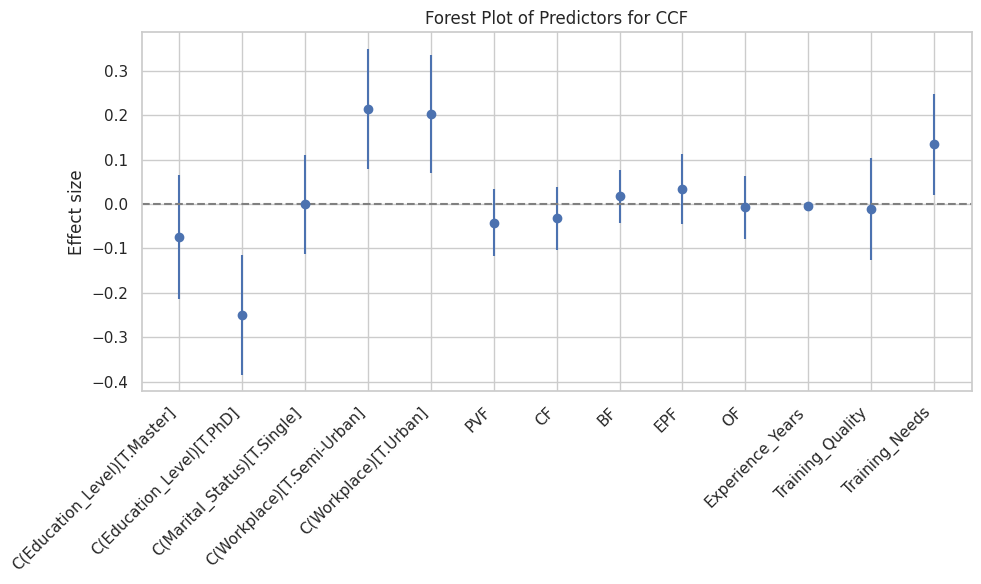

In [5]:
# Step 6: Visualize Forest Plot
coefs = model.params[1:]
errors = model.bse[1:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(coefs.index, coefs, yerr=errors, fmt='o')
ax.axhline(0, color='gray', linestyle='--')
ax.set_title('Forest Plot of Predictors for CCF')
ax.set_ylabel('Effect size')
ax.set_xticklabels(coefs.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# Step 7: Kruskal-Wallis for Workplace
for var in ['EPF', 'CF', 'BF', 'CCF', 'PVF', 'OF']:
    groups = [group[var].values for name, group in df.groupby('Workplace')]
    stat, p = stats.kruskal(*groups)
    print(f'{var}: H={stat:.2f}, p={p:.4f}')

EPF: H=0.92, p=0.6326
CF: H=0.62, p=0.7341
BF: H=1.26, p=0.5321
CCF: H=2.50, p=0.2860
PVF: H=0.46, p=0.7944
OF: H=0.30, p=0.8621


## Next Steps
- Apply CINeMA confidence domains on real study data
- Implement indirectness and imprecision with bootstrapped CIs
- Construct risk of bias tables
- Expand with Bayesian NMA if needed